In [160]:
# Import the dependencies
import pandas as pd
import numpy as np
import datetime

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# ORM Stuff
from sqlalchemy import create_engine, inspect, text, func
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base

In [162]:
conn = engine.connect() # Raw SQL/Pandas

In [164]:
query = text("""SELECT 
                    cat.category, 
                    count(c.outcome) as "outcome_count" 
                FROM 
                    campaign c
                INNER JOIN 
                    category cat ON c.category_id = cat.category_id
                GROUP BY 
                    cat.category;""")
category_outcome_count_df = pd.read_sql(query, con=conn)
category_outcome_count_df

,category,outcome_count
0,food,46
1,theater,344
2,publishing,67
3,music,175
4,journalism,4
5,technology,96
6,photography,42
7,film & video,178
8,games,48


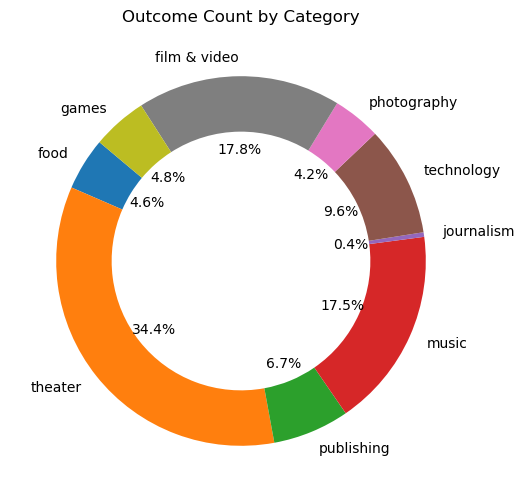

In [204]:
import matplotlib.pyplot as plt

# Plotting the donut chart
plt.figure(figsize=(8, 6))  # Set the size of the figure
plt.pie(category_outcome_count_df['outcome_count'], 
        labels=category_outcome_count_df['category'],  
        autopct='%1.1f%%', 
        startangle=140,  
        wedgeprops={'width': 0.3})  

# Title for the pie chart
plt.title('Outcome Count by Category')

# Save the chart
plt.savefig("Visualizations/Outcome_Count_by_Category.png", format='png')

# Display the chart
plt.show()


In [168]:
query = text("""SELECT 
    c.company_name, 
    c.goal, 
    c.pledged, 
    ROUND((c.pledged/c.goal), 2) AS percentage_funded
FROM 
    campaign c
ORDER BY 
    percentage_funded Desc
LIMIT 10;""")
percentage_funded_df = pd.read_sql(query, con=conn)
percentage_funded_df

,company_name,goal,pledged,percentage_funded
0,Williams-Jones,600.0,14033.0,23.39
1,Garza-Bryant,800.0,14725.0,18.41
2,"Smith, Love and Smith",800.0,13474.0,16.84
3,Ramirez-Myers,900.0,14547.0,16.16
4,Green-Carr,900.0,14324.0,15.92
5,Smith-Schmidt,900.0,13772.0,15.30
6,Porter-George,1000.0,14973.0,14.97
7,Petersen and Sons,900.0,12607.0,14.01
8,Wong-Walker,900.0,12102.0,13.45
9,Turner-Davis,600.0,8038.0,13.40


In [170]:
query = text("""SELECT 
                    scat.subcategory, 
                    COUNT(CASE WHEN c.outcome = 'successful' THEN 1 END) AS successful_count
                FROM 
                    campaign c
                INNER JOIN 
                    subcategory scat ON c.subcategory_id = scat.subcategory_id
                GROUP BY 
                    scat.subcategory
                ORDER BY
                	successful_count DESC;
            """)
successful_count_df = pd.read_sql(query, con=conn)
successful_count_df.head(10)

,subcategory,successful_count
0,plays,187
1,rock,49
2,web,36
3,documentary,34
4,wearables,28
5,photography books,26
6,indie rock,23
7,drama,22
8,food trucks,22
9,animation,21


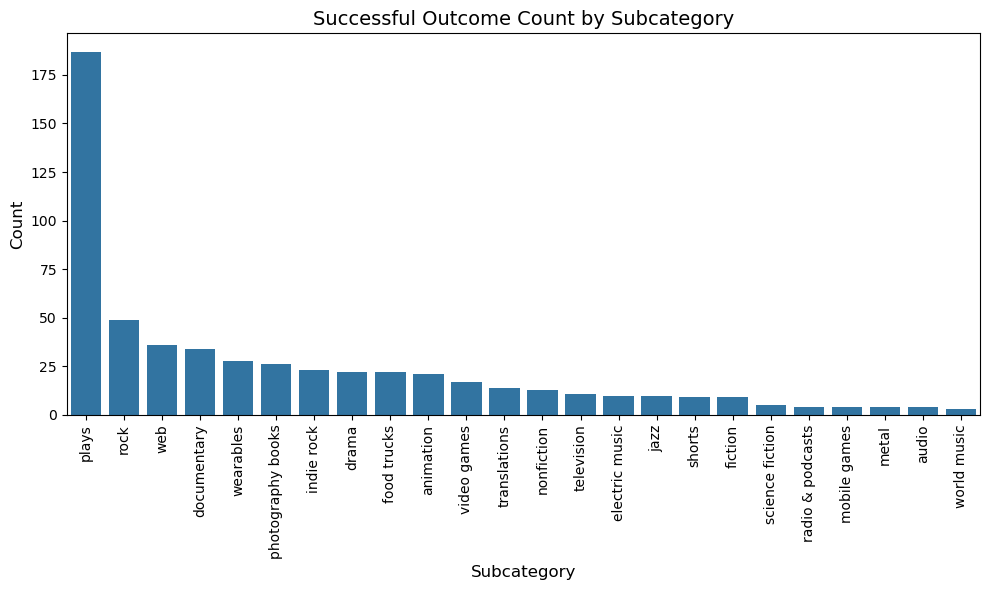

In [207]:
# Create the plot
plt.figure(figsize=(10, 6))

# Use seaborn to create a barplot
sns.barplot(x='subcategory', y='successful_count', data=successful_count_df)

# Adding the labels and title
plt.xlabel('Subcategory', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Successful Outcome Count by Subcategory', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Layout adjustment for better visibility
plt.tight_layout()

# Save the chart
plt.savefig("Visualizations/Successful_Outcome_Count_by_Subcategory.png", format='png')

# Show the plot
plt.show()


In [174]:
query = text("""SELECT 
                    scat.subcategory, 
                    COUNT(CASE WHEN c.outcome = 'failed' THEN 1 END) AS failed_count
                FROM 
                    campaign c
                INNER JOIN 
                    subcategory scat ON c.subcategory_id = scat.subcategory_id
                GROUP BY 
                    scat.subcategory
                ORDER BY
                	failed_count DESC;
            """)
failed_count_df = pd.read_sql(query, con=conn)
failed_count_df.head(10)

,subcategory,failed_count
0,plays,132
1,rock,30
2,documentary,21
3,food trucks,20
4,indie rock,19
5,wearables,16
6,video games,15
7,web,12
8,drama,12
9,photography books,11


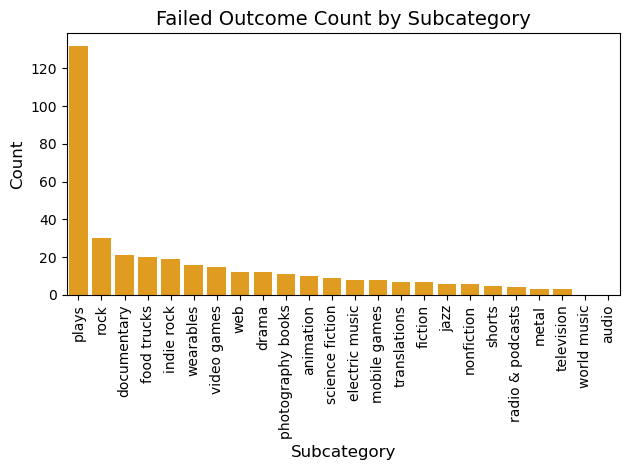

In [209]:
# Use seaborn to create a barplot
sns.barplot(x='subcategory', y='failed_count', data=failed_count_df, color = 'orange')

# Adding the labels and title
plt.xlabel('Subcategory', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Failed Outcome Count by Subcategory', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Layout adjustment for better visibility
plt.tight_layout()

# Save the chart
plt.savefig("Visualizations/Failed_Outcome_Count_by_Subcategory.png", format='png')

# Show the plot
plt.show()

In [215]:
query = text("""SELECT 
                    cat.category, 
                    SUM(c.backers_count) AS total_backers
                FROM 
                    campaign c
                INNER JOIN 
                    category cat ON c.category_id = cat.category_id
                GROUP BY 
                    cat.category
                ORDER BY 
                    total_backers DESC;
                """)
df = pd.read_sql(query, con=conn)
df

,category,total_backers
0,theater,264269
1,music,129002
2,film & video,121875
3,technology,67494
4,publishing,52619
5,games,37662
6,food,28846
7,photography,24044
8,journalism,1194


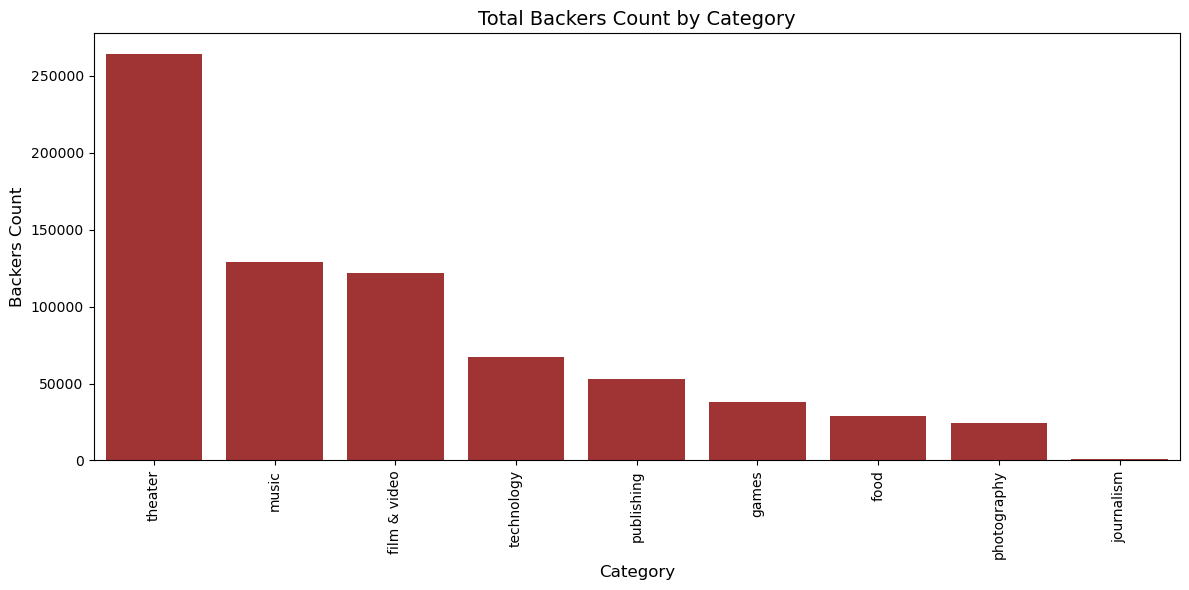

In [217]:
# Create the plot
plt.figure(figsize=(12, 6))

# Create a barplot using seaborn
sns.barplot(x='category', y='total_backers', data=df, color='Firebrick')

# Adding labels and title
plt.xlabel('Category', fontsize=12)
plt.ylabel('Backers Count', fontsize=12)
plt.title('Total Backers Count by Category', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Layout adjustment for better visibility
plt.tight_layout()

# Save the chart
plt.savefig("Visualizations/Total_Backers_Count_by_category.png", format='png')

# Show the plot
plt.show()


In [219]:
query = text(""" SELECT cat.category,
    SUM(c.pledged) AS total_pledged
FROM
    campaign c
JOIN
    category cat ON c.category_id = cat.category_id
GROUP BY
    cat.category
ORDER BY
    total_pledged DESC;
""")
total_pledged_df = pd.read_sql(query, con=conn)
total_pledged_df

,category,total_pledged
0,theater,15763227.0
1,film & video,7510076.0
2,music,7480097.0
3,technology,3833725.0
4,publishing,3149827.0
5,games,2015817.0
6,food,1735179.0
7,photography,1223931.0
8,journalism,36176.0


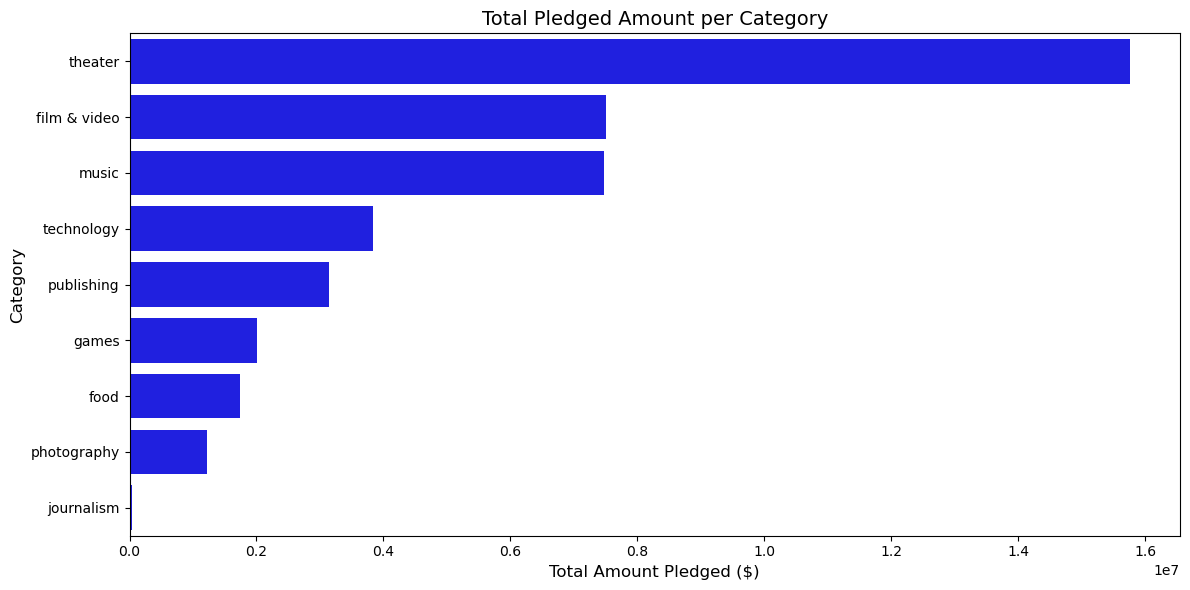

In [223]:
# Create the plot
plt.figure(figsize=(12, 6))

# Create a horizontal barplot using seaborn
sns.barplot(x='total_pledged', y='category', data=total_pledged_df, color='Blue')

# Adding labels and title
plt.xlabel('Total Amount Pledged ($)', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.title('Total Pledged Amount per Category', fontsize=14)

# Layout adjustment for better visibility
plt.tight_layout()

# Save the chart
plt.savefig("Visualizations/Total_Pledged_Amount_Per_category.png", format='png')

# Show the plot
plt.show()


In [227]:
query = text(""" SELECT scat.subcategory,
    SUM(c.pledged) AS total_pledged
FROM
    campaign c
JOIN
    subcategory scat ON c.subcategory_id = scat.subcategory_id
GROUP BY
    scat.subcategory
ORDER BY
    total_pledged DESC;

""")
df = pd.read_sql(query, con=conn)
df

,subcategory,total_pledged
0,plays,15763227.0
1,rock,3603659.0
2,documentary,2448783.0
3,web,2195343.0
4,indie rock,2037576.0
5,food trucks,1735179.0
6,animation,1700624.0
7,wearables,1638382.0
8,photography books,1223931.0
9,drama,1208745.0


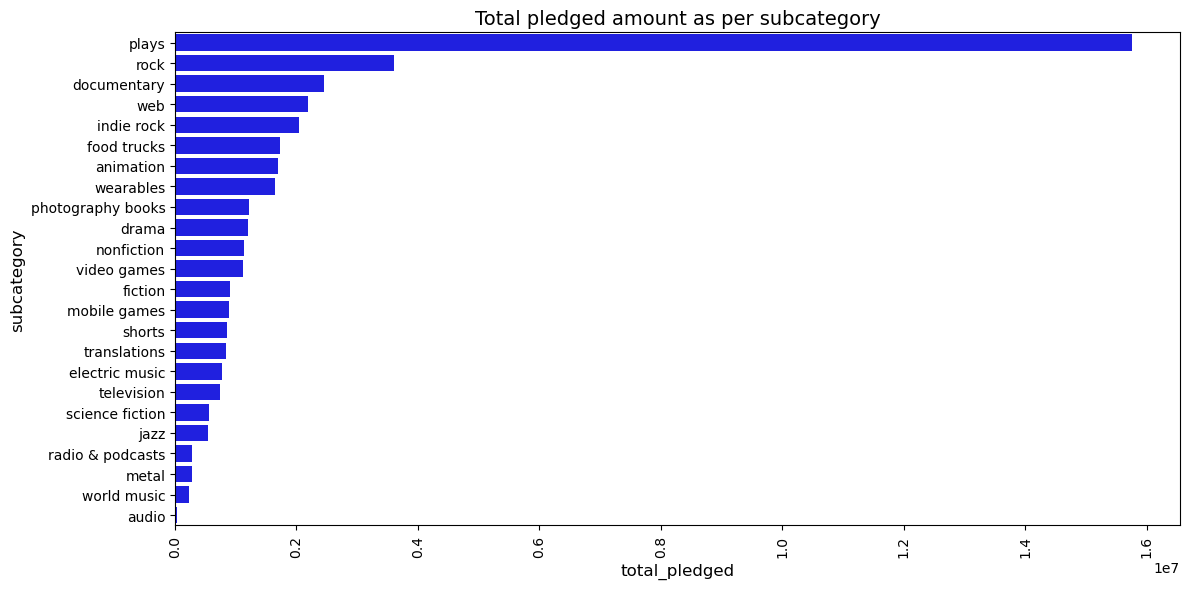

In [229]:
# Create the plot
plt.figure(figsize=(12, 6))

# Create a barplot using seaborn
sns.barplot(x='total_pledged',y='subcategory', data=df, color='Blue')

# Adding labels and title
plt.ylabel('subcategory', fontsize=12)
plt.xlabel('total_pledged', fontsize=12)
plt.title('Total pledged amount as per subcategory', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Layout adjustment for better visibility
plt.tight_layout()

# Save the chart
plt.savefig("Visualizations/Total_Pledged_Amount_Per_Subcategory.png", format='png')

# Show the plot
plt.show()